# 배달 예측

In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('data_sul/delivery_eta_train.csv')
test_data = pd.read_csv('data_sul/delivery_eta_test.csv')

In [2]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [3]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [4]:
# order_ID는 필요 없음
df_train = df_train.drop('Order_ID',axis=1)
df_test = df_test.drop('Order_ID',axis=1)

In [5]:
# 결측치, 이상치 확인
df_train.info()
# 결측치 없음

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        4000 non-null   float64
 1   Prep_Time_min      4000 non-null   int64  
 2   Riders_Available   4000 non-null   int64  
 3   Order_Queue        4000 non-null   int64  
 4   Weather            4000 non-null   str    
 5   Rain_mm            4000 non-null   float64
 6   Temp_C             4000 non-null   float64
 7   Wind_mps           4000 non-null   float64
 8   Rush_Hour          4000 non-null   int64  
 9   DayOfWeek          4000 non-null   int64  
 10  Time_Slot          4000 non-null   str    
 11  Vehicle            4000 non-null   str    
 12  Road_Type          4000 non-null   str    
 13  Promo              4000 non-null   int64  
 14  Tip_Level          4000 non-null   int64  
 15  Delivery_Time_min  4000 non-null   float64
dtypes: float64(5), int64(7), str(4)
mem

In [6]:
df_train.describe()
# 이상치도 없어 보인다.

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,Tip_Level,Delivery_Time_min
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,5.974750,14.997500,8.006250,4.048500,1.323450,13.051725,2.809450,0.401250,2.940000,0.294500,1.50425,66.745900
std,4.076066,5.017847,4.344183,2.044919,2.706038,9.193198,1.200715,0.490213,2.013557,0.455875,1.11973,22.278719
min,0.300000,3.000000,1.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.100000
25%,2.900000,12.000000,4.000000,3.000000,0.000000,7.100000,2.000000,0.000000,1.000000,0.000000,0.00000,50.700000
50%,5.100000,15.000000,8.000000,4.000000,0.000000,13.150000,2.800000,0.000000,3.000000,0.000000,2.00000,63.100000
75%,8.100000,18.000000,12.000000,5.000000,1.600000,19.100000,3.600000,1.000000,5.000000,1.000000,3.00000,79.125000
max,20.000000,36.000000,15.000000,13.000000,24.900000,35.000000,7.800000,1.000000,6.000000,1.000000,3.00000,150.000000


In [7]:
# 학습 데이터의 target 데이터와 features 데이터로 구분
X_train = df_train.drop('Delivery_Time_min',axis=1)
y_train = df_train['Delivery_Time_min']

In [8]:
X_train.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level
0,6.1,15,9,3,Clear,0.0,14.9,1.2,1,1,Dinner,Scooter,Suburban,0,2
1,7.5,14,15,6,Clear,0.0,14.3,3.0,0,0,Lunch,Scooter,Downtown,1,3
2,17.6,24,14,4,Rain,4.8,27.0,3.2,0,0,Dinner,Bike,Downtown,0,2
3,6.8,15,11,5,Clear,0.0,9.2,5.4,0,3,Night,Scooter,Highway,0,0
4,19.6,16,11,2,Clear,0.0,11.8,2.6,1,2,Dinner,Bike,Downtown,0,1


In [9]:
# 스케일링 작업
# 숫자 데이터부터 진행 Distance_km, Prep_Time_min, Riders_Available ,Order_Queue ...
# 문자열 데이터와 숫자형 데이터 분리
# 문자열 행 Weather,Time_Slot,Vehicle,Road_Type

X_train_df_str = X_train.select_dtypes(include='str').columns

X_train_df_num = X_train.select_dtypes(include='number').columns



In [10]:
X_train_df_str

Index(['Weather', 'Time_Slot', 'Vehicle', 'Road_Type'], dtype='str')

In [11]:
X_train_df_num

Index(['Distance_km', 'Prep_Time_min', 'Riders_Available', 'Order_Queue',
       'Rain_mm', 'Temp_C', 'Wind_mps', 'Rush_Hour', 'DayOfWeek', 'Promo',
       'Tip_Level'],
      dtype='str')

In [12]:
X_train['DayOfWeek'].describe()

count    4000.000000
mean        2.940000
std         2.013557
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: DayOfWeek, dtype: float64

In [13]:
# X_train_df_num 에서 정규화를 적용할 목록 DayOfWeek , Promo , Tip_Level
# 이유 : 최댓값과 최솟값이 정해져 있기 때문 = X 이게 아닌거 같다.

X_train_df_num_mm = X_train_df_num[8:11]
X_train_df_num_std = X_train_df_num[0:8]

In [14]:
# 숫자형 데이터 적용

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

scaled_X_num_std = std_scaler.fit_transform(X_train[X_train_df_num_std])
scaled_X_num_mm = mm_scaler.fit_transform(X_train[X_train_df_num_mm])


In [15]:
scaled_X_num_std

array([[ 3.07319979e-02,  4.98283938e-04,  2.28782757e-01, ...,
         2.01073235e-01, -1.34057743e+00,  1.22156123e+00],
       [ 3.74243352e-01, -1.98815291e-01,  1.61011261e+00, ...,
         1.35799431e-01,  1.58716972e-01, -8.18624540e-01],
       [ 2.85243240e+00,  1.79432046e+00,  1.37989097e+00, ...,
         1.51742829e+00,  3.25305239e-01, -8.18624540e-01],
       ...,
       [-5.82681134e-01, -3.98128866e-01, -1.43888526e-03, ...,
        -2.23206494e-01, -1.42387157e+00, -8.18624540e-01],
       [-1.07341164e+00,  4.98283938e-04,  1.61011261e+00, ...,
         5.16563291e-01, -2.34010704e+00, -8.18624540e-01],
       [-1.04887511e+00, -1.98815291e-01,  1.37989097e+00, ...,
         4.18652584e-01,  4.08599373e-01, -8.18624540e-01]],
      shape=(4000, 8))

In [16]:
# 표준화데이터, 정규화데이터  데이터 프레임으로 변형
X_num_std_sacled_df = pd.DataFrame(scaled_X_num_std,columns=X_train_df_num_std)
X_num_mm_sacled_df = pd.DataFrame(scaled_X_num_mm,columns=X_train_df_num_mm)

In [17]:
X_num_std_sacled_df.head()

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour
0,0.030732,0.000498,0.228783,-0.512798,-0.489134,0.201073,-1.340577,1.221561
1,0.374243,-0.198815,1.610113,0.954436,-0.489134,0.135799,0.158717,-0.818625
2,2.852432,1.794320,1.379891,-0.023720,1.284899,1.517428,0.325305,-0.818625
3,0.202488,0.000498,0.689226,0.465358,-0.489134,-0.419028,2.157776,-0.818625
4,3.343163,0.199812,0.689226,-1.001876,-0.489134,-0.136175,-0.174460,1.221561


In [18]:
X_num_mm_sacled_df.head()

,DayOfWeek,Promo,Tip_Level
0,0.166667,0.0,0.666667
1,0.000000,1.0,1.000000
2,0.000000,0.0,0.666667
3,0.500000,0.0,0.000000
4,0.333333,0.0,0.333333


In [19]:
# 기존 데이터프레임(X_train)에 변환한 데이터로 바꾸기

for temp in X_train:
    for std_temp in X_num_std_sacled_df:
        for mm_temp in X_num_mm_sacled_df:
            if temp == std_temp:
                X_train[temp] = X_num_std_sacled_df[std_temp]
            elif temp == mm_temp:
                X_train[temp] = X_num_mm_sacled_df[mm_temp]

In [20]:
# 기존 학습 데이터에 적용이 되었는지 확인
X_train

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Time_Slot,Vehicle,Road_Type,Promo,Tip_Level
0,0.030732,0.000498,0.228783,-0.512798,Clear,-0.489134,0.201073,-1.340577,1.221561,0.166667,Dinner,Scooter,Suburban,0.0,0.666667
1,0.374243,-0.198815,1.610113,0.954436,Clear,-0.489134,0.135799,0.158717,-0.818625,0.000000,Lunch,Scooter,Downtown,1.0,1.000000
2,2.852432,1.794320,1.379891,-0.023720,Rain,1.284899,1.517428,0.325305,-0.818625,0.000000,Dinner,Bike,Downtown,0.0,0.666667
3,0.202488,0.000498,0.689226,0.465358,Clear,-0.489134,-0.419028,2.157776,-0.818625,0.500000,Night,Scooter,Highway,0.0,0.000000
4,3.343163,0.199812,0.689226,-1.001876,Clear,-0.489134,-0.136175,-0.174460,1.221561,0.333333,Dinner,Bike,Downtown,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.852583,-0.198815,-1.612990,0.465358,Clear,-0.489134,0.331621,-0.924107,-0.818625,0.833333,Lunch,Scooter,Suburban,0.0,1.000000
3996,-0.656291,-0.398129,-1.612990,0.465358,Rain,-0.378257,0.821174,2.241070,1.221561,0.833333,Morning,Scooter,Downtown,0.0,0.000000
3997,-0.582681,-0.398129,-0.001439,-0.023720,Clear,-0.489134,-0.223206,-1.423872,-0.818625,0.000000,Morning,Scooter,Suburban,0.0,0.000000
3998,-1.073412,0.000498,1.610113,1.932592,Clear,-0.489134,0.516563,-2.340107,-0.818625,0.666667,Dinner,Bike,Suburban,0.0,0.666667


In [21]:
# 문자 데이터 스케일링 작업
# 문자열 값만 모아둔 변수 : X_train_df_str
X_train_df_str

Index(['Weather', 'Time_Slot', 'Vehicle', 'Road_Type'], dtype='str')

In [22]:
X_train['Weather']

0       Clear
1       Clear
2        Rain
3       Clear
4       Clear
        ...  
3995    Clear
3996     Rain
3997    Clear
3998    Clear
3999    Clear
Name: Weather, Length: 4000, dtype: str

In [23]:
# 원핫 인코딩으로 진행
# 기존 생각 > 원-핫 인코딩 + 정규화 조합
# -> 제미나이 답변 : 원-핫 인코딩으로 이미 0과 1로 인코딩을 했기 때문에 굳이 스케일링 작업을 추가로 할 필요 없다.
# 두번째 생각 > 라벨 인코딩 + 정규화 조합
# -> 제미나이 답변 : 라벨 인코딩 시 각 데이터에 scalar 값이 부여되기 때문에 값에 크기가 생겨버리는 문제 발생

from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()

X_str_enc = ohenc.fit_transform(X_train[['Weather']])

In [24]:
# weather의 unique 값으로 컬럼을 선정하기 위해 추출
weather_data = X_train['Weather'].value_counts()
weather_data

Weather
Clear    2522
Rain      975
Snow      259
Fog       244
Name: count, dtype: int64

In [25]:
# 데이터프레임으로 변형
# 0번이 Clear , 1번이 Rain, 2번이 Snow, 3번이 Fog
df_weather = pd.DataFrame(X_str_enc.toarray(),columns=weather_data)
df_weather

count,2522,975,259,244
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3995,1.0,0.0,0.0,0.0
3996,0.0,0.0,1.0,0.0
3997,1.0,0.0,0.0,0.0
3998,1.0,0.0,0.0,0.0


In [26]:
time_slot_data = X_train['Time_Slot'].value_counts()

In [27]:
# Time_Slot 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Time_Slot']])
time_slot_data = X_train['Time_Slot'].value_counts()
df_time_slot = pd.DataFrame(X_str_enc.toarray(),columns=time_slot_data)
df_time_slot

count,1049,966,839,585,561
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
3995,0.0,0.0,1.0,0.0,0.0
3996,0.0,0.0,0.0,1.0,0.0
3997,0.0,0.0,0.0,1.0,0.0
3998,0.0,1.0,0.0,0.0,0.0


In [28]:
# Vehicle 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Vehicle']])
vehicle_data = X_train['Vehicle'].unique()
df_vehicle = pd.DataFrame(X_str_enc.toarray(),columns=vehicle_data)
df_vehicle

,Scooter,Bike,Car
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
3995,0.0,0.0,1.0
3996,0.0,0.0,1.0
3997,0.0,0.0,1.0
3998,1.0,0.0,0.0


In [29]:
# Road_Type 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Road_Type']])
road_type_data = X_train['Road_Type'].unique()
df_road_type = pd.DataFrame(X_str_enc.toarray(),columns=road_type_data)
df_road_type

,Suburban,Downtown,Highway
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
3995,0.0,0.0,1.0
3996,1.0,0.0,0.0
3997,0.0,0.0,1.0
3998,0.0,0.0,1.0


In [30]:
# 원핫 인코딩 데이터 프레임 : df_road_type, df_vehicle, df_time_slot, df_weather
# 기존 데이터 프레임에 추가

X_train = pd.concat([X_train,df_road_type,df_vehicle,df_time_slot,df_weather], axis=1)
X_train

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Weather,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,...,Car,1049,966,839,585,561,2522,975,259,244
0,0.030732,0.000498,0.228783,-0.512798,Clear,-0.489134,0.201073,-1.340577,1.221561,0.166667,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.374243,-0.198815,1.610113,0.954436,Clear,-0.489134,0.135799,0.158717,-0.818625,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.852432,1.794320,1.379891,-0.023720,Rain,1.284899,1.517428,0.325305,-0.818625,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.202488,0.000498,0.689226,0.465358,Clear,-0.489134,-0.419028,2.157776,-0.818625,0.500000,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.343163,0.199812,0.689226,-1.001876,Clear,-0.489134,-0.136175,-0.174460,1.221561,0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.852583,-0.198815,-1.612990,0.465358,Clear,-0.489134,0.331621,-0.924107,-0.818625,0.833333,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3996,-0.656291,-0.398129,-1.612990,0.465358,Rain,-0.378257,0.821174,2.241070,1.221561,0.833333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3997,-0.582681,-0.398129,-0.001439,-0.023720,Clear,-0.489134,-0.223206,-1.423872,-0.818625,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3998,-1.073412,0.000498,1.610113,1.932592,Clear,-0.489134,0.516563,-2.340107,-0.818625,0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
# 기존 문자열이 있던 칼럼 삭제
# 문자열이 있던 리스트 X_train_df_str
for temp in X_train_df_str:
    X_train = X_train.drop(temp, axis=1)

In [32]:
X_train

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,...,Car,1049,966,839,585,561,2522,975,259,244
0,0.030732,0.000498,0.228783,-0.512798,-0.489134,0.201073,-1.340577,1.221561,0.166667,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.374243,-0.198815,1.610113,0.954436,-0.489134,0.135799,0.158717,-0.818625,0.000000,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.852432,1.794320,1.379891,-0.023720,1.284899,1.517428,0.325305,-0.818625,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.202488,0.000498,0.689226,0.465358,-0.489134,-0.419028,2.157776,-0.818625,0.500000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,3.343163,0.199812,0.689226,-1.001876,-0.489134,-0.136175,-0.174460,1.221561,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.852583,-0.198815,-1.612990,0.465358,-0.489134,0.331621,-0.924107,-0.818625,0.833333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3996,-0.656291,-0.398129,-1.612990,0.465358,-0.378257,0.821174,2.241070,1.221561,0.833333,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3997,-0.582681,-0.398129,-0.001439,-0.023720,-0.489134,-0.223206,-1.423872,-0.818625,0.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3998,-1.073412,0.000498,1.610113,1.932592,-0.489134,0.516563,-2.340107,-0.818625,0.666667,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 전체 데이터 정리

In [33]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('data_sul/delivery_eta_train.csv')
test_data = pd.read_csv('data_sul/delivery_eta_test.csv')

In [34]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

In [35]:
df_train_copy = df_train.copy()
df_train_copy = df_train.copy()

In [36]:
# order_ID는 필요 없음
df_train = df_train.drop('Order_ID',axis=1)
df_test = df_test.drop('Order_ID',axis=1)

In [37]:
# 결측치, 이상치 확인
df_train.info()
# 결측치 없음

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance_km        4000 non-null   float64
 1   Prep_Time_min      4000 non-null   int64  
 2   Riders_Available   4000 non-null   int64  
 3   Order_Queue        4000 non-null   int64  
 4   Weather            4000 non-null   str    
 5   Rain_mm            4000 non-null   float64
 6   Temp_C             4000 non-null   float64
 7   Wind_mps           4000 non-null   float64
 8   Rush_Hour          4000 non-null   int64  
 9   DayOfWeek          4000 non-null   int64  
 10  Time_Slot          4000 non-null   str    
 11  Vehicle            4000 non-null   str    
 12  Road_Type          4000 non-null   str    
 13  Promo              4000 non-null   int64  
 14  Tip_Level          4000 non-null   int64  
 15  Delivery_Time_min  4000 non-null   float64
dtypes: float64(5), int64(7), str(4)
mem

In [38]:
df_train.describe()
# 이상치도 없어 보인다.

,Distance_km,Prep_Time_min,Riders_Available,Order_Queue,Rain_mm,Temp_C,Wind_mps,Rush_Hour,DayOfWeek,Promo,Tip_Level,Delivery_Time_min
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,5.974750,14.997500,8.006250,4.048500,1.323450,13.051725,2.809450,0.401250,2.940000,0.294500,1.50425,66.745900
std,4.076066,5.017847,4.344183,2.044919,2.706038,9.193198,1.200715,0.490213,2.013557,0.455875,1.11973,22.278719
min,0.300000,3.000000,1.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.100000
25%,2.900000,12.000000,4.000000,3.000000,0.000000,7.100000,2.000000,0.000000,1.000000,0.000000,0.00000,50.700000
50%,5.100000,15.000000,8.000000,4.000000,0.000000,13.150000,2.800000,0.000000,3.000000,0.000000,2.00000,63.100000
75%,8.100000,18.000000,12.000000,5.000000,1.600000,19.100000,3.600000,1.000000,5.000000,1.000000,3.00000,79.125000
max,20.000000,36.000000,15.000000,13.000000,24.900000,35.000000,7.800000,1.000000,6.000000,1.000000,3.00000,150.000000


## X_train 다시 정리

In [39]:
# 지금까지의 데이터 처리 순서대로 test데이터도 정리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# 학습 데이터의 target 데이터와 features 데이터로 구분
X_train = df_train.drop('Delivery_Time_min',axis=1)
y_train = df_train['Delivery_Time_min']

# 문자열 데이터와 숫자형 데이터 분리
X_train_df_str = X_train.select_dtypes(include='str').columns
X_train_df_num = X_train.select_dtypes(include='number').columns

# X_train_df_num 에서 정규화를 적용할 목록 DayOfWeek , Promo , Tip_Level
X_train_df_num_mm = X_train_df_num[8:11] # DayOfWeek , Promo , Tip_Level
X_train_df_num_std = X_train_df_num[0:8] 

# 숫자형 데이터 적용
scaled_X_num_std = std_scaler.fit_transform(X_train[X_train_df_num_std])
scaled_X_num_mm = mm_scaler.fit_transform(X_train[X_train_df_num_mm])

# 표준화데이터, 정규화데이터  데이터 프레임으로 변형
X_num_std_sacled_df = pd.DataFrame(scaled_X_num_std,columns=X_train_df_num_std)
X_num_mm_sacled_df = pd.DataFrame(scaled_X_num_mm,columns=X_train_df_num_mm)

# 기존 데이터프레임(X_train)에 변환한 데이터로 바꾸기
for temp in X_train:
    for std_temp in X_num_std_sacled_df:
        for mm_temp in X_num_mm_sacled_df:
            if temp == std_temp:
                X_train[temp] = X_num_std_sacled_df[std_temp]
            elif temp == mm_temp:
                X_train[temp] = X_num_mm_sacled_df[mm_temp]

# 문자 데이터 스케일링 작업
# 문자열 값만 모아둔 변수 : X_train_df_str
# Weather 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Weather']])
weather_data = X_train['Weather'].unique()
df_weather = pd.DataFrame(X_str_enc.toarray(),columns=weather_data)

# Time_Slot 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Time_Slot']])
time_slot_data = X_train['Time_Slot'].unique()
df_time_slot = pd.DataFrame(X_str_enc.toarray(),columns=time_slot_data)

# Vehicle 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Vehicle']])
vehicle_data = X_train['Vehicle'].unique()
df_vehicle = pd.DataFrame(X_str_enc.toarray(),columns=vehicle_data)

# Road_Type 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Road_Type']])
road_type_data = X_train['Road_Type'].unique()
df_road_type = pd.DataFrame(X_str_enc.toarray(),columns=road_type_data)

# 원핫 인코딩 데이터 프레임 : df_road_type, df_vehicle, df_time_slot, df_weather
# 기존 데이터 프레임에 추가
X_train = pd.concat([X_train,df_road_type,df_vehicle,df_time_slot,df_weather], axis=1)

# 기존 문자열이 있던 칼럼 삭제
# 문자열이 있던 리스트 X_train_df_str
for temp in X_train_df_str:
    X_train = X_train.drop(temp, axis=1)

## X_test 정리

In [40]:
# 지금까지의 데이터 처리 순서대로 test데이터도 정리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# 테스트 데이터의 target 데이터와 features 데이터로 구분
X_test = df_test.drop('Delivery_Time_min',axis=1)
y_test = df_test['Delivery_Time_min']

# 문자열 데이터와 숫자형 데이터 분리
X_test_df_str = X_test.select_dtypes(include='str').columns
X_test_df_num = X_test.select_dtypes(include='number').columns

# X_test_df_num 에서 정규화를 적용할 목록 DayOfWeek , Promo , Tip_Level
X_test_df_num_mm = X_test_df_num[8:11] # DayOfWeek , Promo , Tip_Level
X_test_df_num_std = X_test_df_num[0:8] 

# 숫자형 데이터 적용
scaled_X_num_std = std_scaler.fit_transform(X_test[X_test_df_num_std])
scaled_X_num_mm = mm_scaler.fit_transform(X_test[X_test_df_num_mm])

# 표준화데이터, 정규화데이터  데이터 프레임으로 변형
X_num_std_sacled_df = pd.DataFrame(scaled_X_num_std,columns=X_test_df_num_std)
X_num_mm_sacled_df = pd.DataFrame(scaled_X_num_mm,columns=X_test_df_num_mm)

# 기존 데이터프레임(X_train)에 변환한 데이터로 바꾸기
for temp in X_test:
    for std_temp in X_num_std_sacled_df:
        for mm_temp in X_num_mm_sacled_df:
            if temp == std_temp:
                X_test[temp] = X_num_std_sacled_df[std_temp]
            elif temp == mm_temp:
                X_test[temp] = X_num_mm_sacled_df[mm_temp]

# 문자 데이터 스케일링 작업
# 문자열 값만 모아둔 변수 : X_test_df_str
# Weather 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Weather']])
weather_data = X_test['Weather'].unique()
df_weather = pd.DataFrame(X_str_enc.toarray(),columns=weather_data)

# Time_Slot 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Time_Slot']])
time_slot_data = X_test['Time_Slot'].unique()
df_time_slot = pd.DataFrame(X_str_enc.toarray(),columns=time_slot_data)

# Vehicle 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Vehicle']])
vehicle_data = X_test['Vehicle'].unique()
df_vehicle = pd.DataFrame(X_str_enc.toarray(),columns=vehicle_data)

# Road_Type 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Road_Type']])
road_type_data = X_test['Road_Type'].unique()
df_road_type = pd.DataFrame(X_str_enc.toarray(),columns=road_type_data)

# 원핫 인코딩 데이터 프레임 : df_road_type, df_vehicle, df_time_slot, df_weather
# 기존 데이터 프레임에 추가
X_test = pd.concat([X_test,df_road_type,df_vehicle,df_time_slot,df_weather], axis=1)

# 기존 문자열이 있던 칼럼 삭제
# 문자열이 있던 리스트 X_test_df_str
for temp in X_test_df_str:
    X_test = X_test.drop(temp, axis=1)

In [41]:
# 마지막으로 데이터프레임의 컬럼 순서를 정렬
# 컬럼 순서가 달라 학습을 못하는 문제 발생

X_train = X_train.sort_index(axis=1)
X_test = X_test.sort_index(axis=1)

In [42]:
# 정렬 확인
print(X_train.columns)
print(X_test.columns)

Index(['Afternoon', 'Bike', 'Car', 'Clear', 'DayOfWeek', 'Dinner',
       'Distance_km', 'Downtown', 'Fog', 'Highway', 'Lunch', 'Morning',
       'Night', 'Order_Queue', 'Prep_Time_min', 'Promo', 'Rain', 'Rain_mm',
       'Riders_Available', 'Rush_Hour', 'Scooter', 'Snow', 'Suburban',
       'Temp_C', 'Tip_Level', 'Wind_mps'],
      dtype='str')
Index(['Afternoon', 'Bike', 'Car', 'Clear', 'DayOfWeek', 'Dinner',
       'Distance_km', 'Downtown', 'Fog', 'Highway', 'Lunch', 'Morning',
       'Night', 'Order_Queue', 'Prep_Time_min', 'Promo', 'Rain', 'Rain_mm',
       'Riders_Available', 'Rush_Hour', 'Scooter', 'Snow', 'Suburban',
       'Temp_C', 'Tip_Level', 'Wind_mps'],
      dtype='str')


# 여기서 부터 다시 시작
## 학습 중 과적합이 일어난 것 같아 전제 숫자 데이터를 MinMaxScaler로 교체해서 테스트

#### 분석 중 뽑은 unique 값으로 컬럼명을 설정하면 섞일수 있다는 것을 알게되어 수정

In [43]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('data_sul/delivery_eta_train.csv')
test_data = pd.read_csv('data_sul/delivery_eta_test.csv')

df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

# order_ID는 필요 없음
df_train = df_train.drop('Order_ID',axis=1)
df_test = df_test.drop('Order_ID',axis=1)

### 2차 X_train 전처리

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
# std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# 학습 데이터의 target 데이터와 features 데이터로 구분
X_train = df_train.drop('Delivery_Time_min',axis=1)
y_train = df_train['Delivery_Time_min']

# 문자열 데이터와 숫자형 데이터 분리
X_train_df_str = X_train.select_dtypes(include='str').columns
X_train_df_num = X_train.select_dtypes(include='number').columns

# 전체 숫자형 데이터에 정규화 진행
X_train_df_num_mm = X_train_df_num
# X_train_df_num_std = X_train_df_num[0:8] 

# 숫자형 데이터 적용
# scaled_X_num = std_scaler.fit_transform(X_train[X_train_df_num])
scaled_X_num_mm = mm_scaler.fit_transform(X_train[X_train_df_num_mm])

# 정규화데이터를 데이터 프레임으로 변형
# X_num_std_sacled_df = pd.DataFrame(scaled_X_num_std,columns=X_train_df_num_std)
X_num_mm_sacled_df = pd.DataFrame(scaled_X_num_mm,columns=X_train_df_num_mm)

# 기존 데이터프레임(X_train)에 변환한 데이터로 바꾸기
for temp in X_train:
    for mm_temp in X_num_mm_sacled_df:
        if temp == mm_temp:
            X_train[temp] = X_num_mm_sacled_df[mm_temp]

# 문자 데이터 스케일링 작업
# 문자열 값만 모아둔 변수 : X_train_df_str
# Weather 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Weather']])
weather_cols = ohenc.get_feature_names_out(['Weather'])
df_weather = pd.DataFrame(X_str_enc.toarray(),columns=weather_cols)

# Time_Slot 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Time_Slot']])
time_slot_cols = ohenc.get_feature_names_out(['Time_Slot'])
df_time_slot = pd.DataFrame(X_str_enc.toarray(),columns=time_slot_cols)

# Vehicle 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Vehicle']])
vehicle_cols = ohenc.get_feature_names_out(['Vehicle'])
df_vehicle = pd.DataFrame(X_str_enc.toarray(),columns=vehicle_cols)

# Road_Type 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_train[['Road_Type']])
road_type_cols = ohenc.get_feature_names_out(['Road_Type'])
df_road_type = pd.DataFrame(X_str_enc.toarray(),columns=road_type_cols)

# 원핫 인코딩 데이터 프레임 : df_road_type, df_vehicle, df_time_slot, df_weather
# 기존 데이터 프레임에 추가
X_train = pd.concat([X_train,df_road_type,df_vehicle,df_time_slot,df_weather], axis=1)

# 기존 문자열이 있던 칼럼 삭제
# 문자열이 있던 리스트 X_train_df_str
for temp in X_train_df_str:
    X_train = X_train.drop(temp, axis=1)

In [45]:
X_train.nunique()

Distance_km            193
Prep_Time_min           30
Riders_Available        15
Order_Queue             14
Rain_mm                148
Temp_C                 428
Wind_mps                69
Rush_Hour                2
DayOfWeek                7
Promo                    2
Tip_Level                4
Road_Type_Downtown       2
Road_Type_Highway        2
Road_Type_Suburban       2
Vehicle_Bike             2
Vehicle_Car              2
Vehicle_Scooter          2
Time_Slot_Afternoon      2
Time_Slot_Dinner         2
Time_Slot_Lunch          2
Time_Slot_Morning        2
Time_Slot_Night          2
Weather_Clear            2
Weather_Fog              2
Weather_Rain             2
Weather_Snow             2
dtype: int64

In [46]:
X_test.nunique()

Afternoon             2
Bike                  2
Car                   2
Clear                 2
DayOfWeek             7
Dinner                2
Distance_km         160
Downtown              2
Fog                   2
Highway               2
Lunch                 2
Morning               2
Night                 2
Order_Queue          11
Prep_Time_min        28
Promo                 2
Rain                  2
Rain_mm             105
Riders_Available     15
Rush_Hour             2
Scooter               2
Snow                  2
Suburban              2
Temp_C              341
Tip_Level             4
Wind_mps             63
dtype: int64

In [47]:
X_train.isnull().sum()

Distance_km            0
Prep_Time_min          0
Riders_Available       0
Order_Queue            0
Rain_mm                0
Temp_C                 0
Wind_mps               0
Rush_Hour              0
DayOfWeek              0
Promo                  0
Tip_Level              0
Road_Type_Downtown     0
Road_Type_Highway      0
Road_Type_Suburban     0
Vehicle_Bike           0
Vehicle_Car            0
Vehicle_Scooter        0
Time_Slot_Afternoon    0
Time_Slot_Dinner       0
Time_Slot_Lunch        0
Time_Slot_Morning      0
Time_Slot_Night        0
Weather_Clear          0
Weather_Fog            0
Weather_Rain           0
Weather_Snow           0
dtype: int64

### 2차 X_test 전처리

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

ohenc = OneHotEncoder()
# std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

# 학습 데이터의 target 데이터와 features 데이터로 구분
X_test = df_test.drop('Delivery_Time_min',axis=1)
y_test = df_test['Delivery_Time_min']

# 문자열 데이터와 숫자형 데이터 분리
X_test_df_str = X_test.select_dtypes(include='str').columns
X_test_df_num = X_test.select_dtypes(include='number').columns

# 전체 숫자형 데이터에 정규화 진행
X_test_df_num_mm = X_test_df_num
# X_test_df_num_std = X_test_df_num[0:8] 

# 숫자형 데이터 적용
# scaled_X_num = std_scaler.fit_transform(X_test[X_test_df_num])
scaled_X_num_mm = mm_scaler.fit_transform(X_test[X_test_df_num_mm])

# 정규화데이터를 데이터 프레임으로 변형
# X_num_std_sacled_df = pd.DataFrame(scaled_X_num_std,columns=X_test_df_num_std)
X_num_mm_sacled_df = pd.DataFrame(scaled_X_num_mm,columns=X_test_df_num_mm)

# 기존 데이터프레임(X_test)에 변환한 데이터로 바꾸기
for temp in X_test:
    for mm_temp in X_num_mm_sacled_df:
        if temp == mm_temp:
            X_test[temp] = X_num_mm_sacled_df[mm_temp]

# 문자 데이터 스케일링 작업
# 문자열 값만 모아둔 변수 : X_test_df_str
# Weather 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Weather']])
weather_cols = ohenc.get_feature_names_out(['Weather'])
df_weather = pd.DataFrame(X_str_enc.toarray(),columns=weather_cols)

# Time_Slot 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Time_Slot']])
time_slot_cols = ohenc.get_feature_names_out(['Time_Slot'])
df_time_slot = pd.DataFrame(X_str_enc.toarray(),columns=time_slot_cols)

# Vehicle 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Vehicle']])
vehicle_cols = ohenc.get_feature_names_out(['Vehicle'])
df_vehicle = pd.DataFrame(X_str_enc.toarray(),columns=vehicle_cols)

# Road_Type 원핫인코딩 진행
X_str_enc = ohenc.fit_transform(X_test[['Road_Type']])
road_type_cols = ohenc.get_feature_names_out(['Road_Type'])
df_road_type = pd.DataFrame(X_str_enc.toarray(),columns=road_type_cols)

# 원핫 인코딩 데이터 프레임 : df_road_type, df_vehicle, df_time_slot, df_weather
# 기존 데이터 프레임에 추가
X_test = pd.concat([X_test,df_road_type,df_vehicle,df_time_slot,df_weather], axis=1)

# 기존 문자열이 있던 칼럼 삭제
# 문자열이 있던 리스트 X_test_df_str
for temp in X_test_df_str:
    X_test = X_test.drop(temp, axis=1)

In [49]:
# 마지막으로 데이터프레임의 컬럼 순서를 정렬
# 컬럼 순서가 달라 학습을 못하는 문제 발생

X_train = X_train.sort_index(axis=1)
X_test = X_test.sort_index(axis=1)

## LinearRegression 모델 사용

In [50]:
# 선형회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [51]:
# 예측 실행
pred = model.predict(X_test)

In [52]:
# 모델 평가
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test,pred)
mae = mean_absolute_error(y_test,pred)

print(f"r2 socre : {r2}, mae : {mae}")

r2 socre : 0.9167049364346331, mae : 5.103067780231453


## Ridge, Lasso 모델 사용

In [53]:
# L1규제 (Lasso), L2규제 (Ridge)로 해보자
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

r_model = Ridge(random_state=3333)
l_model = Lasso(random_state=3333)

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

r_grid_search = GridSearchCV(r_model, param_grid=params, cv=5)
l_grid_search = GridSearchCV(l_model, param_grid=params, cv=5)

r_grid_search.fit(X_train,y_train)
l_grid_search.fit(X_train,y_train)

# 테스트 결과 확인
print(f"릿지 베스트 파라미터 : {r_grid_search.best_params_}")
print(f"릿지 베스트 스코어 : {r_grid_search.best_score_}")

print(f"랏쏘 베스트 파라미터 : {l_grid_search.best_params_}")
print(f"랏쏘 베스트 스코어 : {l_grid_search.best_score_}")

릿지 베스트 파라미터 : {'alpha': 0.01}
릿지 베스트 스코어 : 0.9512075340200756
랏쏘 베스트 파라미터 : {'alpha': 0.001}
랏쏘 베스트 스코어 : 0.9512149051460245


In [54]:
# 실전 데이터 확인
r_pred = r_grid_search.best_estimator_.predict(X_test)
l_pred = l_grid_search.best_estimator_.predict(X_test)

r_r2 = r2_score(y_test,r_pred)
r_mae = mean_absolute_error(y_test,r_pred)

print(f"릿지 r2 score : {r_r2}, mae : {r_mae}")

l_r2 = r2_score(y_test,l_pred)
l_mae = mean_absolute_error(y_test,l_pred)

print(f"랏쏘 r2 score : {l_r2}, mae : {l_mae}")

릿지 r2 score : 0.9167155666223342, mae : 5.1027947059637775
랏쏘 r2 score : 0.9168987282573205, mae : 5.097325167089746


In [55]:
# 수정 전 스코어 점수
# 랏쏘 베스트 스코어 : 0.9512306512599646
# 랏쏘 r2 score : 0.8017493632146928
# 0.15가 차이나 버린다...

# 수정 후 스코어 점수
# 랏쏘 베스트 스코어 : 0.9512149051460245
# 랏쏘 r2 score : 0.9168987282573205

##### 과적합이 일어난거 같다
##### 문제 1. 거리가 중요하긴하지만 표준화를 했더니 다른 데이터와 차이가 크게 났다.
> 숫자형 데이터 전부다 정규화를 시켜버렸다.
##### 문제 2. unique로 뽑은 데이터를 그대로 썼더니 컬럼명이 섞인 것 같다.
> 제미나이한테 물어봐서 get_feature_names_out 이라는 함수가 있다는 것을 알았다.

In [56]:
from matplotlib import font_manager

font_manager.findSystemFonts()

['C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\segoeui.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\SitkaVF-Italic.ttf',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\NotoSerifKR-VF.ttf',
 'C:\\Windows\\Fonts\\himalaya.ttf',
 'C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\georgia.ttf',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\ariali.ttf',
 'C:\\Windows\\Fonts\\ebrima.ttf',
 'C:\\Windows\\Fonts\\georgiaz.ttf',
 'C:\\Windows\\Fonts\\comicbd.ttf',
 'C:\\Windows\\Fonts\\taileb.ttf',
 'C:\\Windows\\Fonts\\YuGothB.ttc',
 'C:\\Windows\\Fonts\\seguisb.ttf',
 'C:\\Windows\\Fonts\\timesbd.ttf',
 'C:\\Windows\\Fonts\\consolaz.ttf',
 'C:\\Windows\\Fonts\\mingliub.ttc',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\palai.ttf',
 'C:\\Windows\\Fonts\\comic.ttf',
 'C:\\Windows\\Fonts\\ntailub.ttf',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\F

                             0
Distance_km          94.564229
Prep_Time_min        31.236751
Order_Queue          14.864548
Weather_Snow          9.107380
Rush_Hour             6.314352
Rain_mm               5.357838
Wind_mps              4.839713
Vehicle_Bike          3.934657
Road_Type_Downtown    3.358244
Promo                 1.704448
Time_Slot_Night       0.187452
Time_Slot_Afternoon   0.129063
Temp_C                0.015123
Time_Slot_Lunch      -0.048201
Time_Slot_Morning    -0.138751
DayOfWeek            -0.323642
Vehicle_Car          -1.550452
Weather_Rain         -2.769365
Tip_Level            -3.281176
Road_Type_Highway    -3.447830
Riders_Available     -5.809267
Weather_Clear        -8.703156
Road_Type_Suburban         NaN
Time_Slot_Dinner           NaN
Vehicle_Scooter            NaN
Weather_Fog                NaN


<Axes: >

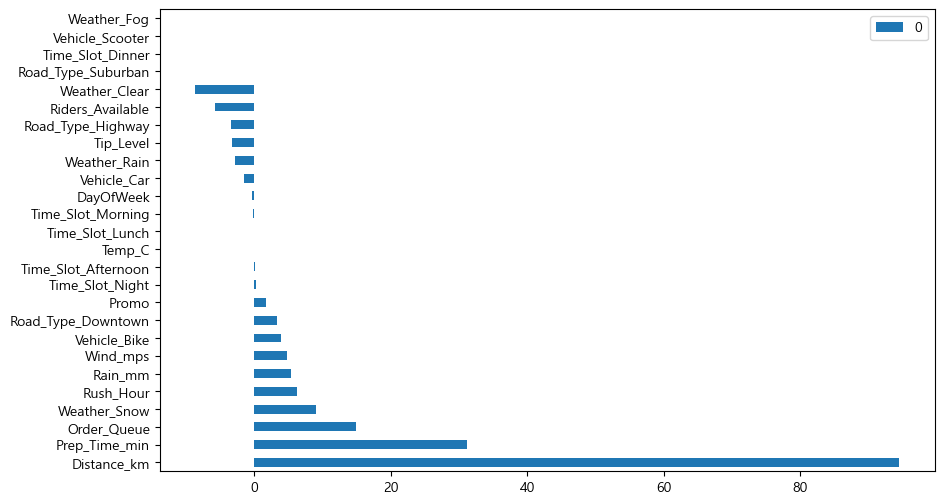

In [57]:
# 회귀 계수를 분석해보자
import matplotlib as plt

df_coef = pd.DataFrame(l_grid_search.best_estimator_.coef_,index=X_train.columns)

# coef 값이 0이면 모델이 필요없다고 판단한 데이터
coef_use = df_coef[df_coef != 0].sort_values(ascending=False, by=0)
print(coef_use)
# 가장 영향력 있는 데이터 : Distance_km(배달 거리)
# 두번째로 영향력 있는 데이터 : Prep_Time_min (음식 준비시간(분))
# 세번째로 영향력 있는 데이터 : Order_Queue (매장 주문 적체(건))

# 시각화에 도전
font_location = 'C://WINDOWS//Fonts//malgun.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
coef_use.plot(kind='barh', figsize=(10, 6))

## PolynomialFeatures 모델 사용

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 위랑 겹치지 않게 새로운 변수에 모델 할당
model = LinearRegression()
model.fit(X_train_poly,y_train)

poly_pred = model.predict(X_test_poly)

poly_r2 = r2_score(y_test,poly_pred)
poly_mae = mean_absolute_error(y_test,poly_pred)

print(f"poly r2 score : {poly_r2}, mae : {poly_mae}")

poly r2 score : 0.9295481037445349, mae : 4.772043795286085


## Random Forest 사용

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

model_rf = RandomForestRegressor(random_state=3333,n_estimators=100,n_jobs=10)

model_rf.fit(X_train,y_train)

rf_pred_train = model_rf.predict(X_train)
rf_pred_test = model_rf.predict(X_test)

rf_test_r2 = r2_score(y_test,rf_pred_test)
mae_test_r2 = mean_absolute_error(y_test,rf_pred_test)
print(f"randomforest r2 score : {poly_r2}, mae : {mae_test_r2}")

randomforest r2 score : 0.9295481037445349, mae : 4.923793000000002


## 결론
### 다항회귀의 데이터가 더 정확히 예측했다

#### Ridge 성능 평가 
##### r2 score : 0.9167155666223342, mae : 5.1027947059637775
#### Lasso 성능 평가 
##### r2 score : 0.9168987282573205, mae : 5.097325167089746
#### 다항회귀 성능 평가 
##### r2 score : 0.9295481037445349, mae : 4.772043795286085